In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pvml import mlp, normalization as norm

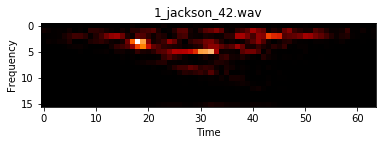

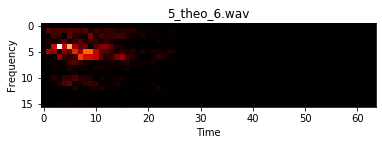

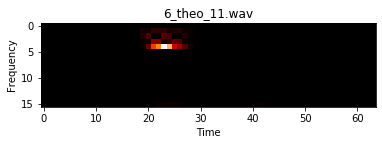

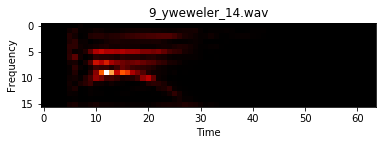

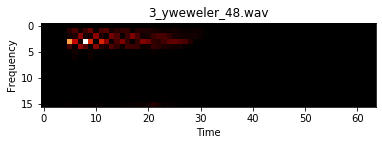

Max:  13797570000.0
Min:  4.015564e-21
Mean:  11925019.085404271
Standard Deviation:  107445121.56665958


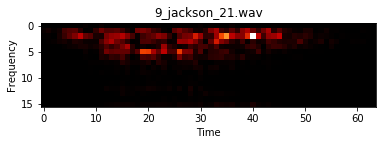

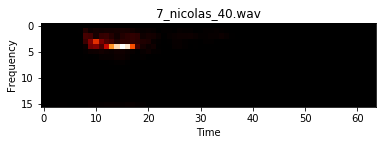

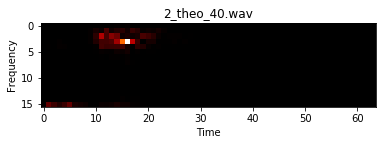

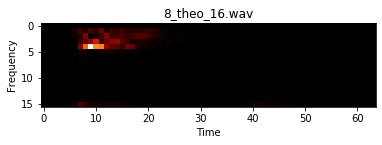

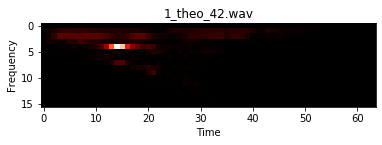

Max:  0.8322946690646436
Min:  6.095273672094359e-29
Mean:  0.0080736635852877
Standard Deviation:  0.03018904530308303


In [2]:
def visualize(data, n, data_path):
    data=data.reshape(len(data), 16, 64)
    f=open(data_path+"train-names.txt")
    names=f.read().split()
    f.close()
    #np.random.seed(0) #<- Use for testing purposes, it ensures repeatability
    for i in range(n):
        s=np.random.randint(0, len(data))
        plot_data=data[s]
        plt.imshow(plot_data, cmap="gist_heat")
        plt.xlabel("Time")
        plt.ylabel("Frequency")
        plt.title(names[s])
        plt.show()
    
data_path="spoken-digits/"
ext=".txt.gz"
train_data=np.loadtxt(data_path+"train"+ext)
x_train=train_data[:,:-1]
y_train=train_data[:,-1].astype(np.int32)

val_data=np.loadtxt(data_path+"validation"+ext)
x_val=val_data[:,:-1]
y_val=val_data[:,-1].astype(np.int32)

test_data=np.loadtxt(data_path+"test"+ext)
x_test=test_data[:,:-1]
y_test=test_data[:,-1].astype(np.int32)

visualize(x_train, 5, data_path)
print("Max: ",x_train.max())
print("Min: ", np.min(x_train[np.nonzero(x_train)]))
print("Mean: ", x_train.mean())
print("Standard Deviation: ", x_train.std())

x_train, x_test=norm.l2_normalization(x_train, x_test)
x_val=norm.l2_normalization(x_val)
visualize(x_train,5,data_path)
print("Max: ",x_train.max())
print("Min: ", np.min(x_train[np.nonzero(x_train)]))
print("Mean: ", x_train.mean())
print("Standard Deviation: ", x_train.std())

In [3]:
nn=mlp.MLP([1024, 512, 256, 128, 10])
epochs=50
batch_size=1
steps=len(x_train)//batch_size
for i in range(epochs):
    nn.train(x_train, y_train, lr=1e-4, lambda_=1e-5, momentum=0.99,
                  steps=steps, batch=batch_size)
    train_labels=nn.inference(x_train)[0]
    val_labels=nn.inference(x_val)[0]
    train_acc=(train_labels==y_train).mean()*100
    val_acc=(val_labels==y_val).mean()*100
    if (i+1)%10==0:
        print("Train Accuracy: ", train_acc, "Validation Accuracy: ", val_acc)

Train Accuracy:  87.38636363636364 Validation Accuracy:  73.33333333333333
Train Accuracy:  95.56818181818181 Validation Accuracy:  75.0
Train Accuracy:  99.14772727272727 Validation Accuracy:  77.5
Train Accuracy:  99.88636363636364 Validation Accuracy:  77.5
Train Accuracy:  100.0 Validation Accuracy:  80.83333333333333


In [4]:
labels=nn.inference(x_test)[0]
test_acc=(labels==y_test).mean()*100
print(test_acc)

85.83333333333333
